Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 46.2830
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 36.7930
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 29.3190
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23.4311
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.7913
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 15.1336
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.2488
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.9721
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.1740
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.7526
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.6277
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7362
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.0285
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.4655
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.0164
Epoch 16/500

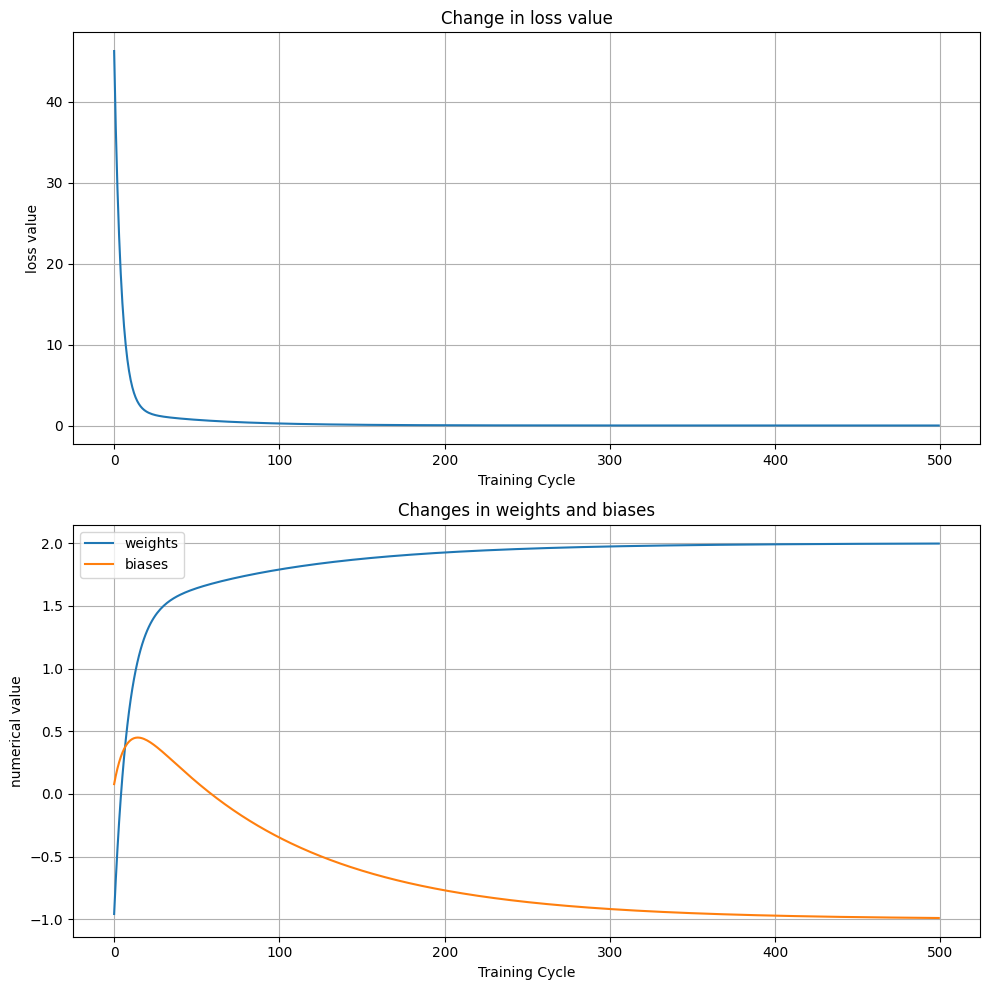

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
預測值: [[18.976908]]
最終權重: [[1.9966532]]
最終偏差: [-0.989624]


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 定義callback類別來收集訓練數據
class TrainingCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.weights = []
        self.biases = []
        self.losses = []
    
    def on_epoch_end(self, epoch, logs=None):
        self.weights.append(self.model.layers[0].get_weights()[0][0][0])
        self.biases.append(self.model.layers[0].get_weights()[1][0])
        self.losses.append(logs['loss'])

# 建立模型
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])
model.compile(optimizer='sgd', loss='mean_squared_error')

# 準備訓練資料
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]
xs = np.array(x, dtype=float)
ys = np.array(y, dtype=float)

# 建立回調實例
callback = TrainingCallback()

# 訓練模型
history = model.fit(xs, ys, epochs=500, callbacks=[callback])

# 創建圖表
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# 繪製損失值變化
ax1.plot(callback.losses)
ax1.set_title('Change in loss value')# 損失值變化
ax1.set_xlabel('Training Cycle') # 訓練週期
ax1.set_ylabel('loss value') # 損失值
ax1.grid(True)

# 繪製權重和偏差變化
ax2.plot(callback.weights, label='weights')
ax2.plot(callback.biases, label='biases')
ax2.set_title('Changes in weights and biases') # 權重和偏差變化
ax2.set_xlabel('Training Cycle') # 訓練週期
ax2.set_ylabel('numerical value') # 數值
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# 輸出最終結果
print("預測值:", model.predict(np.array([10.0])))
print("最終權重:", l0.get_weights()[0])
print("最終偏差:", l0.get_weights()[1])